In [3]:
import pandas as pxndx
Datos = pxndx.read_csv("housing.csv")

In [2]:
Datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='latitude'>

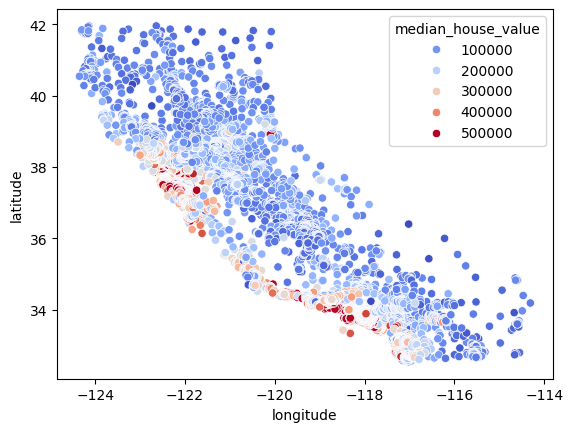

In [4]:
import seaborn as sb
sb.scatterplot(x="longitude", y="latitude", data=Datos, hue="median_house_value",palette="coolwarm" )

<Axes: xlabel='longitude', ylabel='latitude'>

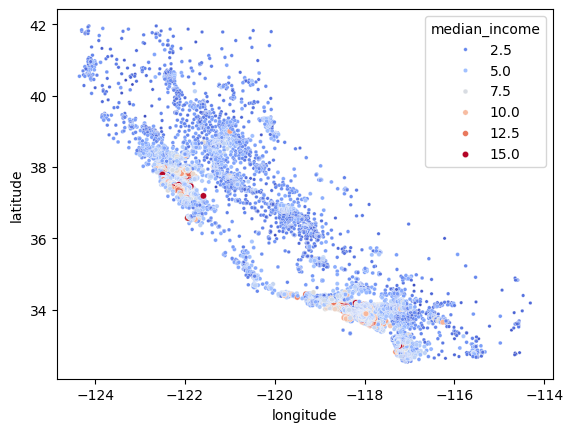

In [8]:
import seaborn as sb
sb.scatterplot(x="longitude", y="latitude", data=Datos, hue="median_income",palette="coolwarm",
               size= "median_income", sizes=(5,20))

In [22]:
from sklearn.cluster import KMeans
X = Datos.loc[:,["latitude", "longitude", "median_income"]]
modelo = KMeans(n_clusters=6)
prediccion = modelo.fit_predict(X)

In [23]:
prediccion.shape

(20640,)

In [24]:
X["Segmento_Economico"] = prediccion

In [26]:
X

,latitude,longitude,median_income,Segmento_Economico
0,37.88,-122.23,8.3252,5
1,37.86,-122.22,8.3014,5
2,37.85,-122.24,7.2574,5
3,37.85,-122.25,5.6431,5
4,37.85,-122.25,3.8462,4
...,...,...,...,...
20635,39.48,-121.09,1.5603,4
20636,39.49,-121.21,2.5568,4
20637,39.43,-121.22,1.7000,4
20638,39.43,-121.32,1.8672,4


In [27]:
X["Segmento_Economico"].value_counts()

Segmento_Economico
0    6855
4    4830
2    3985
5    2813
1    1681
3     476
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

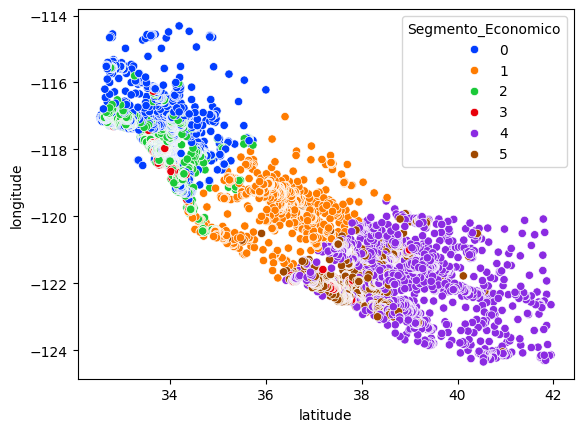

In [28]:
sb.scatterplot(x="latitude",y="longitude",data=X, hue="Segmento_Economico", palette="bright")

<Axes: xlabel='Segmento_Economico', ylabel='count'>

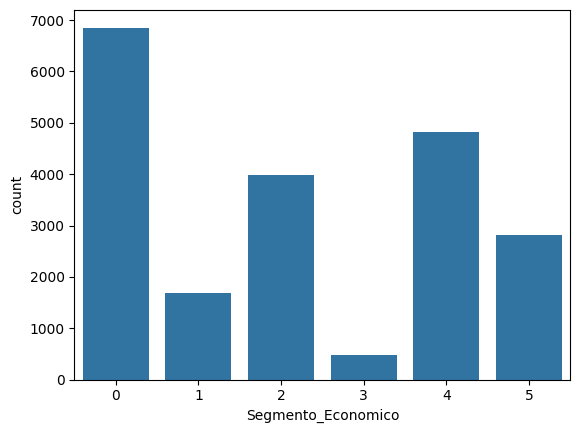

In [29]:
sb.countplot(x="Segmento_Economico", data=X)

In [30]:
X.groupby(["Segmento_Economico"])["median_income"].mean()

Segmento_Economico
0     2.843731
1     2.663152
2     5.449538
3    10.855740
4     2.811072
5     5.495520
Name: median_income, dtype: float64

In [31]:
X.groupby("Segmento_Economico")["median_income"].agg(["mean", "count", "min", "max"])


,mean,count,min,max
Segmento_Economico,,,,
0,2.843731,6855,0.4999,4.3021
1,2.663152,1681,0.4999,5.3909
2,5.449538,3985,4.0750,8.7991
3,10.855740,476,7.9248,15.0001
4,2.811072,4830,0.4999,4.5590
5,5.495520,2813,3.8424,9.5862
